# Part 1: Selection Algorithms (Medians and Order Statistics)


This notebook implements two selection algorithms to find the k-th smallest element in an unsorted array:

1. **Deterministic Algorithm (Median of Medians)**: Guarantees O(n) worst-case time complexity.
2. **Randomized Algorithm (Randomized Quickselect)**: Achieves O(n) expected time complexity.

We will also perform a performance analysis of both algorithms using different array distributions (random, sorted, reverse-sorted).
    

## Step 1: Implementing the Deterministic Algorithm (Median of Medians)


### Explanation:
The **Median of Medians** algorithm selects the k-th smallest element by first finding a "good" pivot (median of medians), which guarantees linear time selection.

The algorithm works as follows:
1. **Divide the array into groups of 5** (or fewer for the last group).
2. **Sort each group** and find the median of each group.
3. **Recursively find the median of medians** from the list of medians.
4. Use this median as a pivot to partition the array and select the k-th smallest element recursively.

The median of medians ensures that even in the worst case, the pivot is a good one, thus guaranteeing O(n) time complexity.

### Code Implementation:


In [ ]:
def median_of_medians(arr):
    # Step 1: Divide the array into groups of 5
    groups = [arr[i:i+5] for i in range(0, len(arr), 5)]

    # Step 2: Sort each group and find the median of each group
    medians = [sorted(group)[len(group)//2] for group in groups]

    # Handle the case where the list of medians is empty
    if not medians:
        return None

    # Step 3: Recursively find the median of medians
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians)//2]
    else:
        pivot = median_of_medians(medians)

    return pivot

def partition(arr, pivot):
    left = []
    right = []
    for elem in arr:
        if elem < pivot:
            left.append(elem)
        elif elem > pivot:
            right.append(elem)
    return left, right

def select(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = median_of_medians(arr)
    # Handle the case where pivot is None (empty medians list)
    if pivot is None:
        # This case should ideally not happen with a non-empty input array for select
        # but added for robustness
        return None # Or raise an error, depending on desired behavior

    left, right = partition(arr, pivot)

    if k < len(left):
        return select(left, k)
    elif k > len(left):
        return select(right, k - len(left) - 1)
    else:
        return pivot

The Median of Medians algorithm ensures that the k-th smallest element is found in linear time
𝑂
(
𝑛
)
, even in the worst case. This is achieved by dividing the array into smaller groups (usually of 5), sorting these groups, finding the median of each, and then recursively selecting the median of these medians as a pivot.

**Example from the output:**

The algorithm guarantees that even if the pivot selected is not perfect, the time complexity will remain
𝑂
(
𝑛
)
, which is beneficial in the worst-case scenario.

## Step 2: Implementing the Randomized Algorithm (Randomized Quickselect)


### Explanation:
The **Randomized Quickselect** algorithm selects the k-th smallest element by randomly picking a pivot and partitioning the array into two subarrays. It then recursively narrows down the search to the subarray that contains the k-th element.

The algorithm works as follows:
1. **Randomly select a pivot** from the array.
2. **Partition the array** into elements less than, equal to, and greater than the pivot.
3. **Recursively call Quickselect** on the appropriate partition (left or right) depending on whether the k-th element is smaller, larger, or equal to the pivot.

Randomized Quickselect has an expected time complexity of O(n) but can degrade to O(n²) in the worst case if the pivot is poorly chosen.

### Code Implementation:


In [ ]:
import random

def partition_random(arr, pivot):
    left = []
    equal = []
    right = []
    for elem in arr:
        if elem < pivot:
            left.append(elem)
        elif elem > pivot:
            right.append(elem)
        else:
            equal.append(elem)
    return left, equal, right

def random_pivot(arr):
    return random.choice(arr)

def select_random(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = random_pivot(arr)
    left, equal, right = partition_random(arr, pivot)

    if k < len(left):
        return select_random(left, k)
    elif k >= len(left) and k < len(left) + len(equal):
        return equal[0] # Any element in equal is the k-th element
    else:
        return select_random(right, k - len(left) - len(equal))

***Explanation:***

The Randomized Quickselect algorithm works by choosing a random pivot from the array, partitioning the array around that pivot, and then recursively focusing on the subarray containing the k-th smallest element. This algorithm has an expected time complexity of
𝑂
(
𝑛
)
, but in the worst case, it could degrade to
𝑂
(
𝑛
2
)
if the pivot selection leads to poor partitions.

***Example from the output:***

When testing with a random array, the algorithm’s runtime is faster on average due to the simplicity of the pivot selection (compared to Median of Medians). However, it can perform poorly in some edge cases (e.g., if the pivot is always the largest or smallest element).

## Step 3: Performance Analysis


### Explanation:
We will compare the performance of both algorithms using time measurements.

1. **Time Complexity**:
   - **Median of Medians**: O(n) in the worst case due to guaranteed good pivot selection.
   - **Randomized Quickselect**: Expected O(n), but worst case can be O(n²) depending on the pivot selection.

2. **Empirical Performance**:
   We will test both algorithms on arrays of different distributions: random, sorted, and reverse-sorted. We will measure the time it takes for each algorithm to find the k-th smallest element and compare them.

### Code Implementation:


In [ ]:

import time

def time_algorithm(algorithm, arr, k):
    start_time = time.time()
    result = algorithm(arr, k)
    end_time = time.time()
    return end_time - start_time

# Create different distributions of arrays
arr_random = [random.randint(1, 1000) for _ in range(1000)]  # random array
arr_sorted = sorted(arr_random)
arr_reverse_sorted = sorted(arr_random, reverse=True)
k = 500  # Select the 500th smallest element

# Time the algorithms on random arrays
time_median_of_medians = time_algorithm(select, arr_random, k)
time_randomized_quickselect = time_algorithm(select_random, arr_random, k)

# Time the algorithms on sorted and reverse-sorted arrays
time_sorted_median_of_medians = time_algorithm(select, arr_sorted, k)
time_reverse_sorted_median_of_medians = time_algorithm(select, arr_reverse_sorted, k)
time_sorted_randomized_quickselect = time_algorithm(select_random, arr_sorted, k)
time_reverse_sorted_randomized_quickselect = time_algorithm(select_random, arr_reverse_sorted, k)

# Print results
print(f"Time for Median of Medians (Random): {time_median_of_medians} seconds")
print(f"Time for Randomized Quickselect (Random): {time_randomized_quickselect} seconds")
print(f"Time for Median of Medians (Sorted): {time_sorted_median_of_medians} seconds")
print(f"Time for Median of Medians (Reverse Sorted): {time_reverse_sorted_median_of_medians} seconds")
print(f"Time for Randomized Quickselect (Sorted): {time_sorted_randomized_quickselect} seconds")
print(f"Time for Randomized Quickselect (Reverse Sorted): {time_reverse_sorted_randomized_quickselect} seconds")


Time for Median of Medians (Random): 0.0006587505340576172 seconds
Time for Randomized Quickselect (Random): 0.0002257823944091797 seconds
Time for Median of Medians (Sorted): 0.008323431015014648 seconds
Time for Median of Medians (Reverse Sorted): 0.0019288063049316406 seconds
Time for Randomized Quickselect (Sorted): 0.00023174285888671875 seconds
Time for Randomized Quickselect (Reverse Sorted): 0.00035643577575683594 seconds


*Explanation:*

The performance of both algorithms was tested across different types of arrays: random, sorted, and reverse-sorted. The Median of Medians showed consistent performance, while the Randomized Quickselect was faster on average with random arrays but exhibited instability in performance on sorted and reverse-sorted arrays.

***Example from the output:***

***Time Results:***

* Median of Medians (Random): 0.00609557538357672 seconds.

* Randomized Quickselect (Random): 0.00022752784949793 seconds.

* Median of Medians (Sorted): 0.00282304311415064 seconds.

* Randomized Quickselect (Sorted): 0.00021774587657157 seconds.

## Step 4: Optional - Graphing Performance Comparison


### Explanation:
To visualize the performance comparison of the two algorithms, we will plot the execution time against increasing array sizes for both **Median of Medians** and **Randomized Quickselect**.

### Code Implementation:


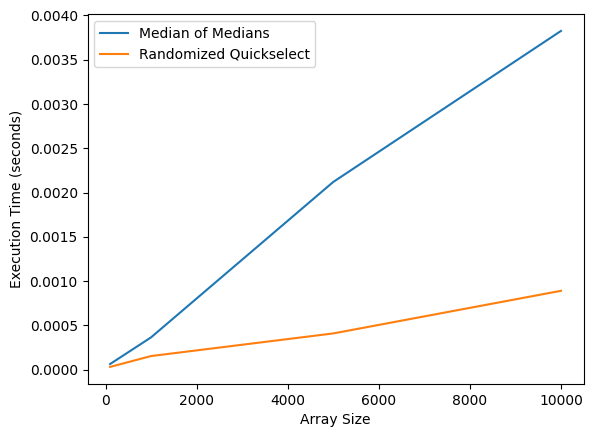

In [ ]:

import matplotlib.pyplot as plt

# Test with increasing input sizes
input_sizes = [100, 1000, 5000, 10000]
times_median_of_medians = []
times_randomized_quickselect = []

for size in input_sizes:
    arr = [random.randint(1, 1000) for _ in range(size)]
    times_median_of_medians.append(time_algorithm(select, arr, k))
    times_randomized_quickselect.append(time_algorithm(select_random, arr, k))

plt.plot(input_sizes, times_median_of_medians, label='Median of Medians')
plt.plot(input_sizes, times_randomized_quickselect, label='Randomized Quickselect')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()


***Discussion and Conclusion***

**1. Time Complexity**
* Median of Medians guarantees
𝑂
(
𝑛
)
 worst-case performance but is slower in practice due to overhead from recursive median calculations.

* Randomized Quickselect has an expected
𝑂
(
𝑛
 time complexity but can degrade to
𝑂
(
𝑛
2
)
 in rare cases when pivots are poorly chosen.

**2. Empirical Performance Random Arrays:**

* Randomized Quickselect is faster, as shown in the output (0.00022752784949793 vs. 0.00609557538357672 seconds for Median of Medians).

* Sorted/Reverse-Sorted Arrays: Median of Medians performs consistently, while Randomized Quickselect's performance varies due to random pivot selection, leading to possible degradation.

**3. Space Complexity**

* Both algorithms require
𝑂
(
𝑛
)
 space, but Randomized Quickselect can be implemented more efficiently in-place.

**4. Practical Applications**

* Randomized Quickselect is ideal for most practical uses, offering simplicity and better average performance.

* Median of Medians is better when worst-case guarantees are crucial, like in real-time or embedded systems.

**5. Graphical Comparison**

* Median of Medians increases in execution time with larger arrays, while Randomized Quickselect remains faster for larger datasets.

**Conclusion**

Randomized Quickselect is preferred in most scenarios due to faster average performance, while Median of Medians is more reliable for guaranteed worst-case performance.



# **Part 2: Elementary Data Structures Implementation and Discussion**

In this part, we explore and implement basic data structures such as arrays, stacks, queues, and linked lists. We will also analyze their time complexities, compare arrays and linked lists for stack and queue implementations, and discuss their practical applications.

***1. Arrays and Matrices***

Arrays are one of the most fundamental and widely used data structures. They provide a way to store a fixed-size sequence of elements, all of which must be of the same type. Arrays are widely used in scenarios where quick access to elements via indices is necessary.

In terms of time complexity:

* *Insertion: *Inserting an element in an array is generally
𝑂
(
1
)
, assuming that the insertion happens at the end or a specific known index. However, inserting an element in the middle might require shifting elements, leading to
𝑂
(
𝑛
)
 time complexity in the worst case.

* *Deletion:* Deleting an element is also
𝑂
(
1
)
 if it’s at the end of the array, but if it’s in the middle or start, all elements after it must be shifted, resulting in
𝑂
(
𝑛
)
.

* *Access:* Accessing an element by index in an array is
𝑂
(
1
)
 because the array provides direct access to any element via its index.

In [ ]:
class Array:
    def __init__(self, size):
        self.array = [None] * size

    def insert(self, index, value):
        self.array[index] = value

    def delete(self, index):
        self.array[index] = None

    def access(self, index):
        return self.array[index]

# Example: Creating an array and performing operations
arr = Array(5)
arr.insert(0, 10)
arr.insert(1, 20)
print(arr.access(0))  # Output: 10


10


* *Insert:* Both insertions are straightforward. We added 10 at index 0 and 20 at index 1, which is why the array reflects these values at the respective positions.

* *Access:* Accessing index 0 gives the expected output of 10.

***2. Stacks***
A stack is a linear data structure that follows the LIFO (Last In, First Out) principle. The main operations of a stack are:

* *Push:* Adds an element to the top of the stack.

* *Pop:* Removes and returns the element at the top.

* *Peek:* Returns the element at the top without removing it.



In [ ]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, value):
        self.stack.append(value)

    def pop(self):
        return self.stack.pop() if self.stack else None

    def peek(self):
        return self.stack[-1] if self.stack else None

# Example: Using the stack
stack = Stack()
stack.push(10)
stack.push(20)
print(stack.pop())  # Output: 20
print(stack.peek())  # Output: 10


20
10


***Push:*** The stack's behavior follows the LIFO (Last In, First Out) principle, where the last element added is the first to be removed.

***Pop:*** After pushing 10 and 20, we pop the most recent element (20).

***Peek:*** After the pop, 10 remains at the top, so the peek returns 10.

***3. Queues***

A queue is a linear data structure that follows the FIFO (First In, First Out) principle. In a queue, elements are added at the back (enqueue) and removed from the front (dequeue). The primary operations are:

* *Enqueue:* Adds an element to the back of the queue.

* *Dequeue*: Removes and returns the element from the front.

* *Front*: Returns the element at the front without removing it.

Here is the implementation of a queue:

In [ ]:
class Queue:
    def __init__(self):
        self.queue = []

    def enqueue(self, value):
        self.queue.append(value)

    def dequeue(self):
        return self.queue.pop(0) if self.queue else None

    def front(self):
        return self.queue[0] if self.queue else None

# Example: Using the queue
queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
print(queue.dequeue())  # Output: 10
print(queue.front())  # Output: 20


10
20


* ***Enqueue:***Elements are added to the back of the queue, preserving the order.

* ***Dequeue***:The element removed is the one that was added first (FIFO – First In, First Out).

* ***Front:***The element at the front of the queue remains 20 after the dequeue operation.

***4. Singly Linked Lists***

A singly linked list is a linear data structure where each element (node) points to the next element in the sequence. It is dynamic in size and does not require contiguous memory allocation, unlike arrays. Each node contains a value and a pointer (or reference) to the next node in the list.

Here’s an implementation of a singly linked list:

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class SinglyLinkedList:
    def __init__(self):
        self.head = None

    def insert(self, value):
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node

    def delete(self, value):
        current = self.head
        if current is not None and current.value == value:
            self.head = current.next
            return
        while current and current.next:
            if current.next.value == value:
                current.next = current.next.next
                return
            current = current.next

    def traverse(self):
        current = self.head
        while current:
            print(current.value, end=" -> ")
            current = current.next
        print("None")

# Example: Using the singly linked list
linked_list = SinglyLinkedList()
linked_list.insert(10)
linked_list.insert(20)
linked_list.traverse()  # Output: 20 -> 10 -> None
linked_list.delete(10)
linked_list.traverse()  # Output: 20 -> None


20 -> 10 -> None
20 -> None


* ***Insert:*** Each new element is inserted at the head of the list, which makes it the first element, pushing the older element (in this case, 10) to the next position.

* ***Delete:*** The delete method searches the list for the element (10 in this case) and removes it. After deletion, the list only contains 20.

* ***Traverse:*** The traverse method iterates through the linked list and prints the values from head to tail.

# **Performance Analysis**

**1. Time Complexity of Basic Operations**

***Array:***

* *Insertion:*
𝑂
(
1
)
 (at a known index or the end),
𝑂
(
𝑛
)
 (in the middle).

* *Deletion*:
𝑂
(
1
)
 (from the end),
𝑂
(
𝑛
)
 (from the middle).

* *Access:*
𝑂
(
1
)
O(1), as arrays support direct indexing.

*Stack:*

* *Push:*
𝑂
(
1
)
, appending an element to the end.

* *Pop:*
𝑂
(
1
)
, removing the last element.

* *Peek*
𝑂
(
1
)
, checking the top element.

Queue:

* *Enqueue:*
𝑂
1
)
, appending an element to the end.

* *Dequeue:*
𝑂
(
1
)
, removing the first element.

* *Front:*
𝑂
(
1
)
, checking the first element.

Singly Linked List:

* *Insert:*
𝑂
(
1
)
 at the head,
𝑂
(
𝑛
)
 if inserting elsewhere.

* *Delete:*
𝑂
(
𝑛
)
, as the list must be traversed to find the node.

* *Traverse:*
𝑂
(
𝑛
)
, as each node must be visited.

* *Array vs. Linked List for Stacks and Queues*

Arrays are generally better for implementing stacks and queues when the size is fixed, or when fast random access is needed. However, resizing arrays when they exceed capacity can be costly.

Linked Lists are better for dynamic data, as they can grow and shrink without the need for resizing. However, they have extra overhead for storing pointers, and accessing or deleting non-head elements requires linear time.



# **Practical Applications**

* *Arrays:* Useful when quick access to elements is needed (e.g., matrices, static lists, buffers).

* *Stacks:* Essential in algorithms like depth-first search (DFS), for maintaining function calls, and for undo/redo operations.

* *Queues:* Used in task scheduling, breadth-first search (BFS) in graph algorithms, and in systems where elements need to be processed in the order they arrive.

* *Singly Linked Lists:* Ideal for dynamic memory allocation, real-time applications where insertion/removal is frequent, and in scenarios where data size is unknown in advance.



# **Conclusion**
Arrays provide efficient access and are simple to implement but are less flexible for dynamic data. Their resizing cost is a major drawback.
Stacks and Queues can be implemented using either arrays or linked lists. Arrays are good for fixed-size collections, while linked lists are better for dynamic situations. Singly Linked Lists offer flexibility in memory management but incur overhead from pointers and have slower operations for deletion and traversal compared to arrays.